In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df  =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
x = df.drop(columns = 'Exited')
y= df['Exited'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [19]:
x_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [21]:
x_train_trf = sc.fit_transform(x_train)
x_test_trf = sc.fit_transform(x_test)

In [22]:
import tensorflow

In [23]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim = 11))
model.add(Dense(11,activation = 'sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [27]:
history = model.fit(x_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 5ms/step - loss: 0.6416 - accuracy: 0.6305 - val_loss: 0.5302 - val_accuracy: 0.7975
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7972 - val_loss: 0.4953 - val_accuracy: 0.7975
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7972 - val_loss: 0.4849 - val_accuracy: 0.7975
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7972 - val_loss: 0.4754 - val_accuracy: 0.7975
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7972 - val_loss: 0.4653 - val_accuracy: 0.7975
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7972 - val_loss: 0.4557 - val_accuracy: 0.7975
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7972 - val_loss: 0.4471 - val_accuracy: 0.7975

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8622 - val_loss: 0.3468 - val_accuracy: 0.8525
Epoch 59/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8627 - val_loss: 0.3494 - val_accuracy: 0.8487
Epoch 60/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8630 - val_loss: 0.3490 - val_accuracy: 0.8494
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8644 - val_loss: 0.3464 - val_accuracy: 0.8519
Epoch 62/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8642 - val_loss: 0.3465 - val_accuracy: 0.8500
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8625 - val_loss: 0.3456 - val_accuracy: 0.8531
Epoch 64/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8634 - val_loss: 0.3442 - val_accuracy:

In [28]:
y_pred = model.predict(x_test)
y_pred

63/63 [==============================] - 0s 804us/step


array([[0.04731907],
       [0.30950567],
       [0.04731907],
       ...,
       [0.04731907],
       [0.02163564],
       [0.30950567]], dtype=float32)

In [29]:
y_pred = y_pred.argmax(axis =-1)

In [30]:
y_pred[75 ]

0

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

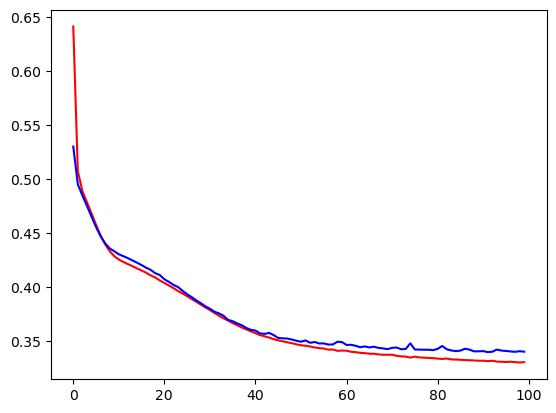

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],c= 'red')
plt.plot(history.history['val_loss'],c= "blue")

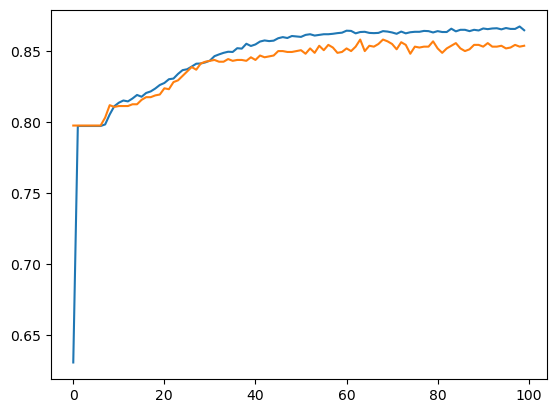

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])